In [1]:
import configparser
import time
import numpy as np
import os
import tensorflow as tf
import configparser
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import importlib
import utils

importlib.reload(utils)

import generator
importlib.reload(generator)

params = configparser.ConfigParser()
params._interpolation = configparser.ExtendedInterpolation()
params.read('./config.ini')

['./config.ini']

In [3]:
from utils import make_or_restore_model

# directory = 'DIRECTORIES_' + params['RUN_CONFIG']['dataset']
directory = 'DIRECTORIES_' + 'IDS2017_LABELS_IDS2017'
# (model, startingEpoch) = make_or_restore_model(params=params, forceRestore='weights.07-0.425.tf')
(model, startingEpoch) = make_or_restore_model(params=params)
val_dataset = generator.input_fn(data_path=os.path.abspath(params[directory]["validation"]), validation=True)

Restoring from D:\TFG\datasets\IDS2018\TensorflowModel\IDS2017\NOTHING\ckpt\weights.18-9.423.tf


In [25]:
result = model.evaluate(val_dataset,
          batch_size=1,
          use_multiprocessing=True)


Opening file in generator: D:\TFG\datasets\IDS2018\preprocessed_IDS2017\EVAL\SHUFFLED\dataset.csv
948/948 [==============================] - 77s 75ms/step - loss: 2.8881 - categorical_accuracy: 0.6823 - specificity_at_sensitivity: 0.9881 - rec_0: 0.0000e+00 - pre_0: 0.0000e+00 - rec_1: 0.0000e+00 - pre_1: 0.0000e+00 - rec_2: 0.9985 - pre_2: 0.8576 - rec_3: 0.0000e+00 - pre_3: 0.0000e+00 - rec_4: 0.0000e+00 - pre_4: 0.0000e+00 - rec_5: 0.0000e+00 - pre_5: 0.0000e+00 - rec_6: 0.0000e+00 - pre_6: 0.0000e+00 - rec_7: 0.0000e+00 - pre_7: 0.0000e+00 - rec_8: 0.0000e+00 - pre_8: 0.0000e+00 - rec_9: 0.0105 - pre_9: 0.1102 - rec_10: 0.0000e+00 - pre_10: 0.0000e+00 - rec_11: 0.0000e+00 - pre_11: 0.0000e+00 - rec_12: 0.0000e+00 - pre_12: 0.0000e+00 - rec_13: 0.6053 - pre_13: 0.8279 - rec_14: 0.8841 - pre_14: 0.5986 - macro_F1: 0.1570 - weighted_F1: 0.6227


In [15]:
predict = model.predict(val_dataset)
predict_labels = [list(row).index(max(row)) for row in predict]

Opening file in generator: D:\TFG\datasets\IDS2018\preprocessed_IDS2017\EVAL\SHUFFLED\dataset.csv
949/949 [==============================] - 25s 26ms/step


In [ ]:
from pathlib import Path
path_2017 = os.path.abspath('D:\TFG\datasets\IDS2018\\preprocessed_IDS2017/')
path_2018 = os.path.abspath('D:\TFG\datasets\IDS2018\\preprocessed_IDS2018/')
dataset = "/EVAL"
attack = "DDoS"
path_2017 = Path(f"{path_2017}{dataset}/SHUFFLED/PREDICTED_LABELS")
path_2018 = Path(f"{path_2018}{dataset}/SHUFFLED/PREDICTED_LABELS")
df_labels = pd.DataFrame(predict_labels)
df_labels.to_csv(f"{path_2017}/dataset.csv")

In [51]:
all_labels = None
for batch in val_dataset:
    (features, labels) = batch
    if all_labels is None:
        all_labels = labels.numpy()
    else:
        all_labels = np.append(all_labels, labels.numpy(), axis = 0)

Opening file in generator: D:\TFG\datasets\IDS2018\preprocessed_IDS2017\EVAL\SHUFFLED\dataset.csv


In [73]:
print("Real labels shape:", all_labels.shape)
print("Predicted labels shape:", predict.shape)

Real labels shape: (189600, 15)
Predicted labels shape: (189600, 15)


In [71]:
import torch
from torch.nn import CrossEntropyLoss

torch_loss = CrossEntropyLoss()

py_l = torch_loss(torch.tensor(predict), torch.tensor(all_labels))

In [79]:
tf_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

all_labels_class = [np.argmax(row) for row in all_labels]

tf_l = tf_loss(all_labels_class, predict)

In [80]:
print(py_l.item())
print(tf_l)

2.1120285987854004
tf.Tensor(2.1120274, shape=(), dtype=float32)


In [58]:
l =list(val_dataset)
df = pd.DataFrame(l)
real_labels = []
for _,graph in df.iterrows():
    real_labels += [list(row).index(max(row)) for row in graph[1]]

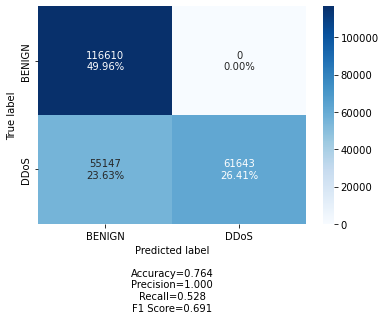

In [67]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(real_labels, predict_labels)
from cf_matrix import make_confusion_matrix
make_confusion_matrix(cf_matrix, categories=['BENIGN', 'DDoS'])

In [11]:
dictKeys = ['loss', 'categorical_accuracy', 'specificity_at_sensitivity', 'rec_0', 'pre_0', 'rec_1', 'pre_1', 'rec_2', 'pre_2', 'rec_3', 'pre_3', 'rec_4', 'pre_4', 'rec_5', 'pre_5', 'rec_6', 'pre_6', 'rec_7', 'pre_7', 'rec_8', 'pre_8', 'rec_9', 'pre_9', 'rec_10', 'pre_10', 'rec_11', 'pre_11', 'rec_12', 'pre_12', 'rec_13', 'pre_13', 'rec_14', 'pre_14', 'macro_F1', 'weighted_F1']
res = dict(zip(dictKeys, result))

In [12]:
res

{'loss': 0.6096042394638062,
 'categorical_accuracy': 0.9054219126701355,
 'specificity_at_sensitivity': 0.9991960525512695,
 'rec_0': 0.0,
 'pre_0': 0.0,
 'rec_1': 0.517754316329956,
 'pre_1': 0.9990741014480591,
 'rec_2': 0.7091147303581238,
 'pre_2': 0.9921241998672485,
 'rec_3': 0.8589743375778198,
 'pre_3': 0.7153024673461914,
 'rec_4': 0.6159601211547852,
 'pre_4': 0.8666666746139526,
 'rec_5': 0.0,
 'pre_5': 0.0,
 'rec_6': 0.0,
 'pre_6': 0.0,
 'rec_7': 0.0,
 'pre_7': 0.0,
 'rec_8': 0.0,
 'pre_8': 0.0,
 'rec_9': 0.9694421291351318,
 'pre_9': 0.9588813185691833,
 'rec_10': 0.9306501746177673,
 'pre_10': 0.9993351101875305,
 'rec_11': 0.0,
 'pre_11': 0.0,
 'rec_12': 0.9783057570457458,
 'pre_12': 1.0,
 'rec_13': 0.8971593379974365,
 'pre_13': 0.9987322092056274,
 'rec_14': 0.9977023601531982,
 'pre_14': 0.8297101259231567,
 'macro_F1': 0.5185315608978271,
 'weighted_F1': 0.8989789485931396}

In [34]:
if params['RUN_CONFIG']['dataset'].endswith('LABELS_IDS2017'):
    attack_names = ['SSH-Patator', 'DoS GoldenEye', 'PortScan', 'DoS Slowhttptest', 'Web Attack  Brute Force', 'Bot', 'Web Attack  Sql Injection', 
                    'Web Attack  XSS', 'Infiltration', 'DDoS', 'DoS slowloris', 'Heartbleed', 'FTP-Patator', 'DoS Hulk','BENIGN']
elif params['RUN_CONFIG']['dataset'].endswith('LABELS_IDS2018'):
    attack_names = ['FTP-BruteForce', 'SSH-BruteForce', 'DoS-GoldenEye', 'DoS-Slowloris', 'DoS-SlowHTTPTest', 'DoS-Hulk', 'DDoS attacks-LOIC-HTTP', 
                    'DDoS-LOIC-UDP', 'DDOS-HOIC', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'Infiltration', 'Bot', 'BENIGN']
indices = range(len(attack_names))
zip_iterator = zip(attack_names,indices)
attacks_dict = dict(zip_iterator)

In [35]:
metrics = dict()
for key, value in res.items():
    if key.startswith('pre'):
        i = int(key.split('_')[1])
        metrics['Pre_' + attack_names[i]] = value
    elif key.startswith('rec'):
        i = int(key.split('_')[1])
        metrics['Rec_' + attack_names[i]] = value
    else:
        metrics[key] = value

In [36]:
metrics

{'loss': 3.7921900749206543,
 'categorical_accuracy': 0.7637231945991516,
 'specificity_at_sensitivity': 0.9831699132919312,
 'Rec_SSH-Patator': 0.0,
 'Pre_SSH-Patator': 0.0,
 'Rec_DoS GoldenEye': 0.0,
 'Pre_DoS GoldenEye': 0.0,
 'Rec_PortScan': 0.0,
 'Pre_PortScan': 0.0,
 'Rec_DoS Slowhttptest': 0.0,
 'Pre_DoS Slowhttptest': 0.0,
 'Rec_Web Attack  Brute Force': 0.0,
 'Pre_Web Attack  Brute Force': 0.0,
 'Rec_Bot': 0.0,
 'Pre_Bot': 0.0,
 'Rec_Web Attack  Sql Injection': 0.0,
 'Pre_Web Attack  Sql Injection': 0.0,
 'Rec_Web Attack  XSS': 0.0,
 'Pre_Web Attack  XSS': 0.0,
 'Rec_Infiltration': 0.0,
 'Pre_Infiltration': 0.0,
 'Rec_DDoS': 1.0,
 'Pre_DDoS': 0.6789243221282959,
 'Rec_DoS slowloris': 0.0,
 'Pre_DoS slowloris': 0.0,
 'Rec_Heartbleed': 0.0,
 'Pre_Heartbleed': 0.0,
 'Rec_FTP-Patator': 0.0,
 'Pre_FTP-Patator': 0.0,
 'Rec_DoS Hulk': 0.0,
 'Pre_DoS Hulk': 0.0,
 'Rec_BENIGN': 0.5278105735778809,
 'Pre_BENIGN': 1.0,
 'macro_F1': 0.09997988492250443,
 'weighted_F1': 0.7498036623001099}

In [ ]:
import pandas as pd
output_path = os.path.abspath(params[directory]["validation_IDS2017"]+"\\dataset_short.csv")
df = pd.read_csv(output_path, header=None, names=generator.features)
df = df[df.columns[0:len(df.columns)-1]]
preds = model.predict(val_dataset, batch_size=16)
preds_str = [generator.attack_names[np.argmax(row)] for row in preds]
[(i, el) for i, el in enumerate(preds_str) if el != 'BENIGN']